<a href="https://colab.research.google.com/github/Abi-DS/BCSE331L-EDA-Project/blob/main/22BDS0122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **22BDS0122**
#**Abinanthan S**
#**BCSE331L - EDA - Course Project**
#**Dataset Link: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv**
#**Github link:https://github.com/Abi-DS/BCSE331L-EDA-Project/blob/main/22BDS0122.ipynb**

#**Phase 1:(Module 1, 2 & 3)**

###1. Setup and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# Load the dataset from the file
df = pd.read_csv('Gunnels.csv')

# Drop the 'rownames' column as it is just an index
df = df.drop('rownames', axis=1)

# Display the first 5 rows to verify
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,0,786,190,10,0.1,0,3,0,0,0
1,0,794,182,10,0.0,0,3,0,0,0
2,0,798,178,20,0.0,0,1,0,0,0
3,0,800,176,70,0.3,0,1,0,1,0
4,0,804,172,40,0.3,0,1,0,1,0


###2. Explore Dimensions and Summary


In [3]:
# -- Dimensions of the Dataset --
print(f"After dropping 'rownames', the dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("-" * 50)

# -- Summary Statistics and Data Types --
print("Dataset Information (Data Types and Non-Null Counts):")
df.info()
print("-" * 50)

# -- Statistical Summary for Numerical Columns --
print("Statistical Summary:")
df.describe()

After dropping 'rownames', the dataset has 1592 rows and 10 columns.
--------------------------------------------------
Dataset Information (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gunnel   1592 non-null   int64  
 1   Time     1592 non-null   int64  
 2   Fromlow  1592 non-null   int64  
 3   Slope    1592 non-null   int64  
 4   Rw       1592 non-null   float64
 5   Amphiso  1592 non-null   int64  
 6   Subst    1592 non-null   int64  
 7   Pool     1592 non-null   int64  
 8   Water    1592 non-null   int64  
 9   Cobble   1592 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 124.5 KB
--------------------------------------------------
Statistical Summary:


,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


###3. Data Cleaning and Handling


In [4]:
# -- Data Cleaning --

# 1. Check for missing values (already confirmed none, but good practice)
print("Missing values in each column:")
print(df.isnull().sum())
print("-" * 50)

# 2. Check for and remove duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicates to remove.")

Missing values in each column:
Gunnel     0
Time       0
Fromlow    0
Slope      0
Rw         0
Amphiso    0
Subst      0
Pool       0
Water      0
Cobble     0
dtype: int64
--------------------------------------------------
Number of duplicate rows found: 90
Removing duplicate rows...
Dataset shape after removing duplicates: (1502, 10)


###4. Univariate Analysis



Performing Univariate Analysis...


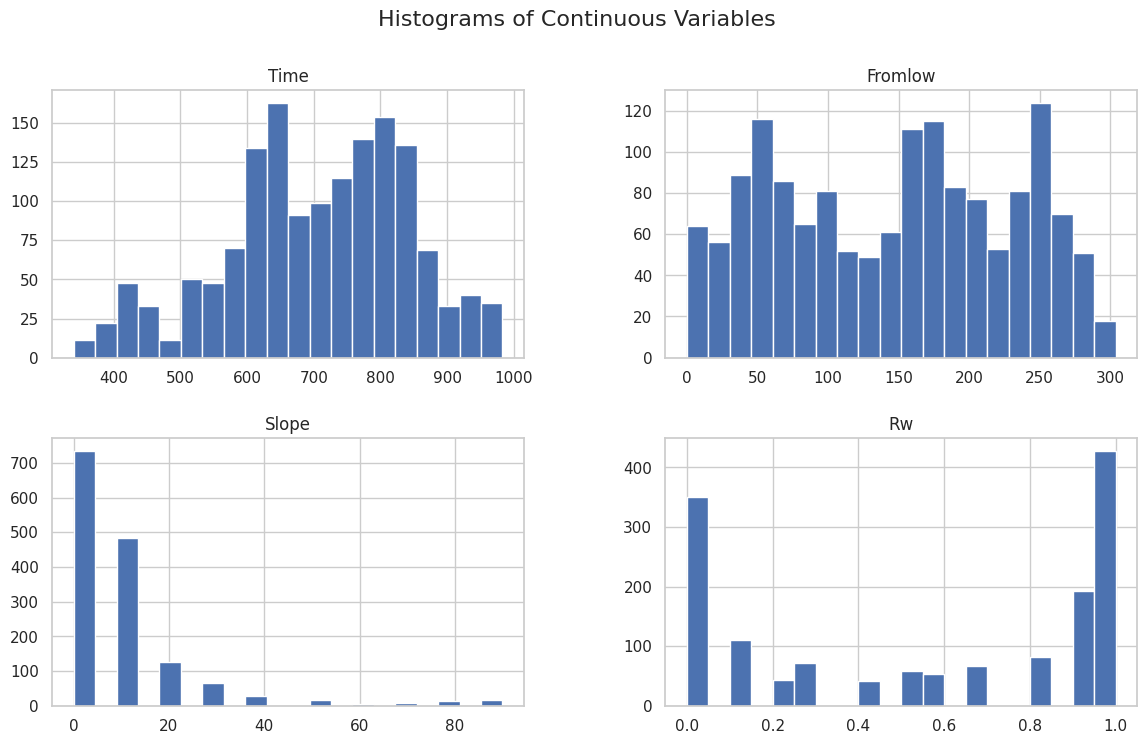

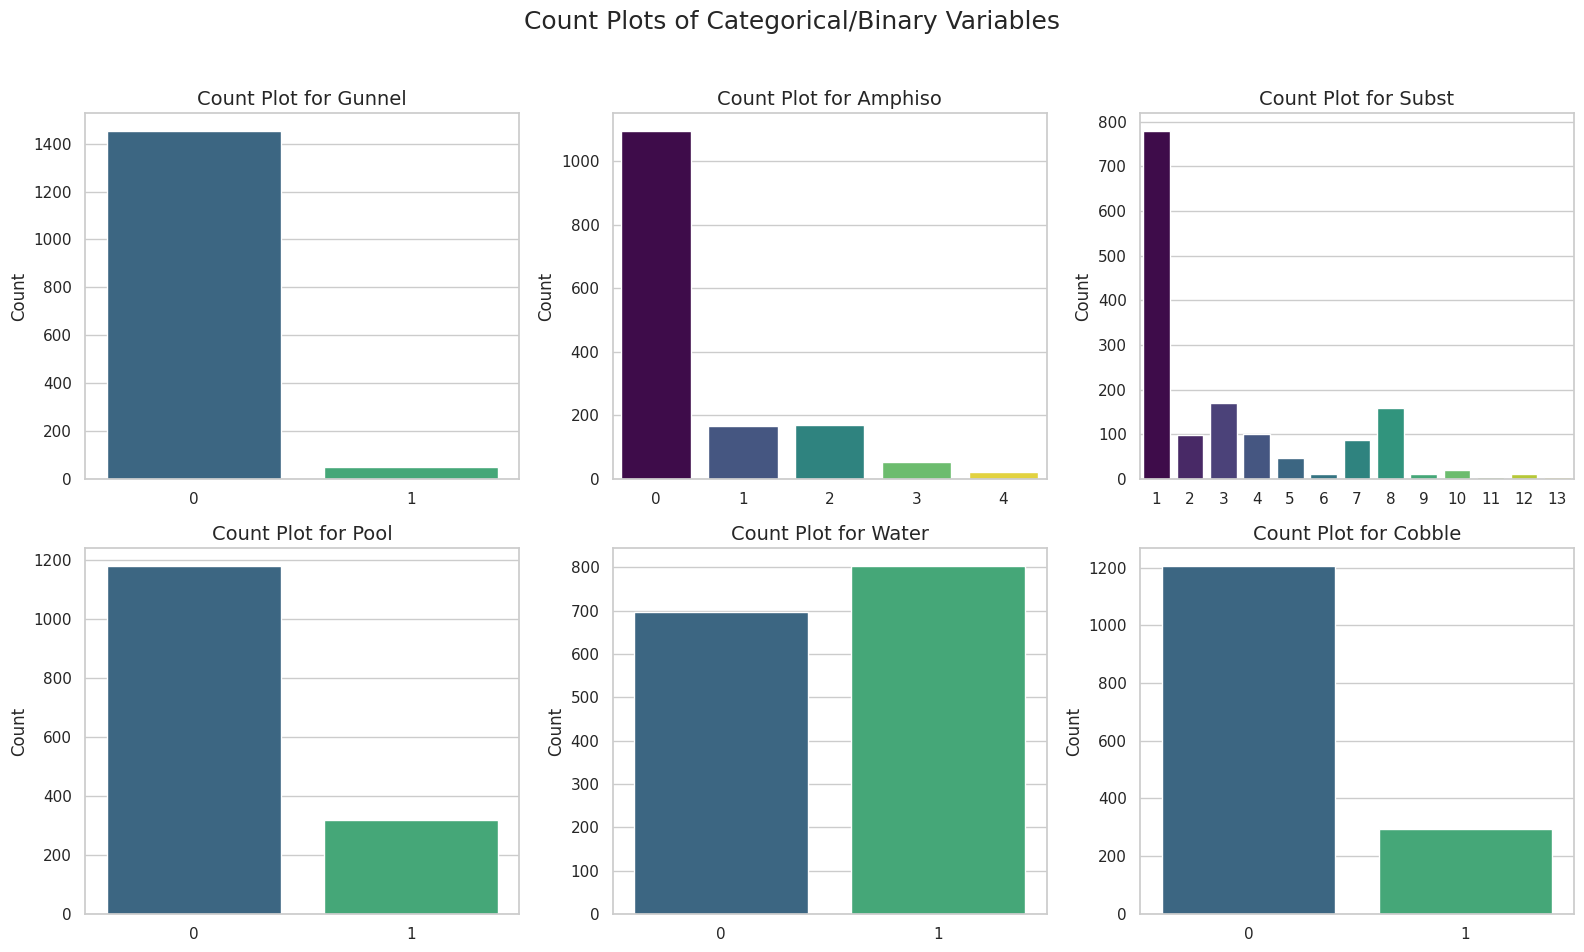

In [5]:
print("\nPerforming Univariate Analysis...")

# -- Histograms for Continuous Variables --
continuous_cols = ['Time', 'Fromlow', 'Slope', 'Rw']
df[continuous_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle('Histograms of Continuous Variables', size=16)
plt.show()


# -- Count Plots for Categorical/Binary Variables --
categorical_cols = ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'Count Plot for {col}', size=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Count Plots of Categorical/Binary Variables', size=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

###5. Bivariate Analysis



Performing Bivariate Analysis...


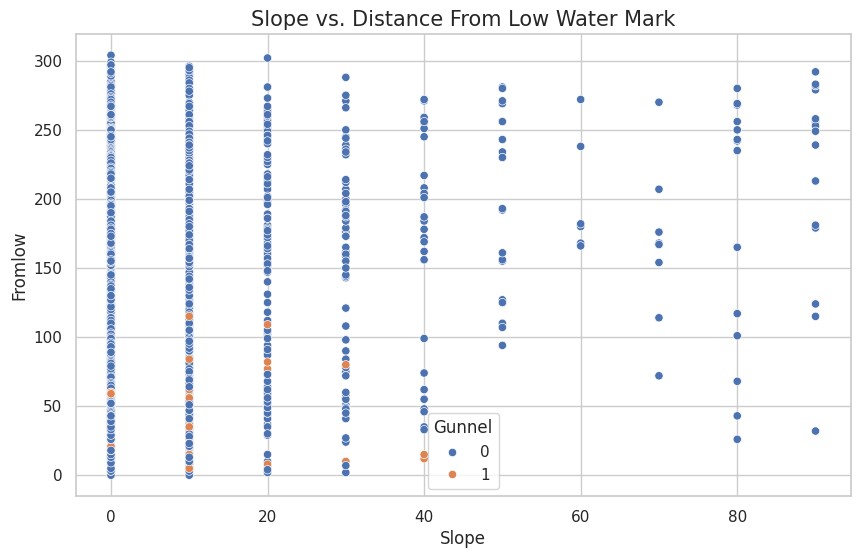

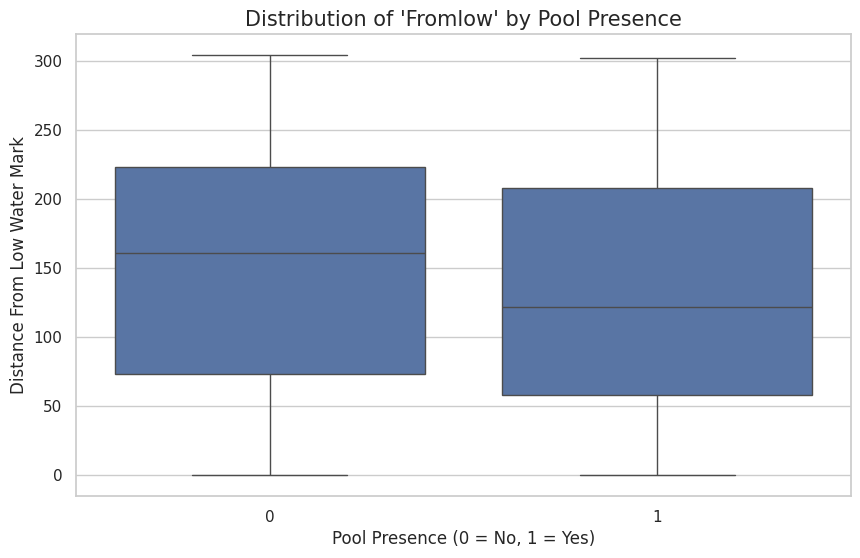

In [6]:
print("\nPerforming Bivariate Analysis...")

# -- Scatter Plot: Slope vs. Fromlow --
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Slope', y='Fromlow', data=df, hue='Gunnel', palette='deep')
plt.title('Slope vs. Distance From Low Water Mark', size=15)
plt.show()

# -- Box Plot: Distribution of 'Fromlow' for each 'Pool' category --
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pool', y='Fromlow', data=df)
plt.title("Distribution of 'Fromlow' by Pool Presence", size=15)
plt.xlabel("Pool Presence (0 = No, 1 = Yes)")
plt.ylabel("Distance From Low Water Mark")
plt.show()

###6. Multivariate Analysis



Performing Multivariate Analysis...


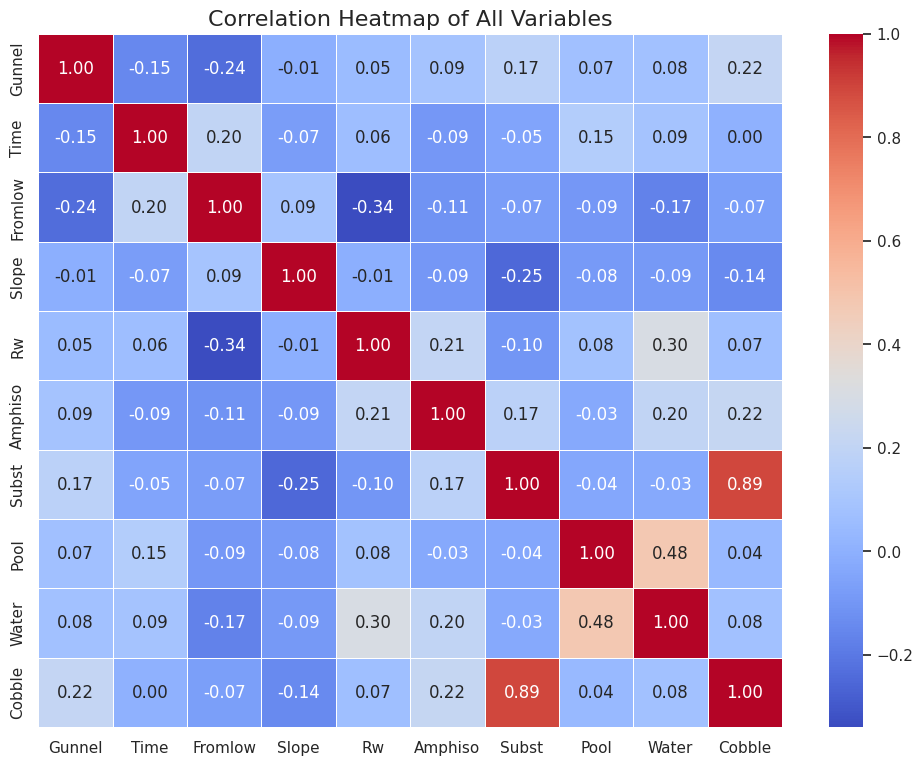

In [7]:
print("\nPerforming Multivariate Analysis...")

# -- Correlation Heatmap --
plt.figure(figsize=(12, 9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Variables', size=16)
plt.show()


###=======================================================
# **Phase 2: Comprehensive Analysis (Module 4 and 5)**
###=======================================================

#***Section 1: Introduction to Deeper Analysis***
-------------------------------------------------

## **Module 4: Deeper Exploratory Data Analysis**


### Setup and loading:
This initial step involves loading the dataset and defining our variables. Based on the data dictionary and initial inspection, columns are classified as either continuous (representing measurements) or categorical (representing distinct groups or binary states), which is crucial for choosing the correct analysis techniques.

In [8]:
# ===================================================================
# Phase 2: Comprehensive Analysis for Gunnels.csv
# ===================================================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. SETUP AND COLUMN SELECTION ---
df = pd.read_csv('Gunnels.csv')
df = df.drop('rownames', axis=1)

# Programmatically define column types
continuous_cols = ['Time', 'Fromlow', 'Slope', 'Rw']
# These are numeric but represent categories
categorical_cols = ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']

print("Analysis will be performed on the following columns:")
print(f"Continuous Variables: {continuous_cols}")
print(f"Categorical Variables: {categorical_cols}")
print("-" * 60)


Analysis will be performed on the following columns:
Continuous Variables: ['Time', 'Fromlow', 'Slope', 'Rw']
Categorical Variables: ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
------------------------------------------------------------


#**(1.) Advanced 1D Analysis: Exploring Individual Variables**
In this section, we move beyond basic plots to statistically analyze each variable on its own. We will calculate skewness to understand the symmetry of the data's distribution and examine quantiles to see where data points lie. The distribution plots (histograms and density plots) provide a visual confirmation of these statistics, helping us identify if the data is normally distributed or skewed. For categorical variables, count plots show the frequency of each category, revealing any class imbalances.



Performing 1D Analysis...
Skewness of Continuous Variables:
Time      -0.393544
Fromlow   -0.065813
Slope      2.955768
Rw        -0.143814
dtype: float64

Quantiles of Continuous Variables:
       Time  Fromlow  Slope   Rw
0.25  623.0    71.75    0.0  0.0
0.50  712.5   158.00    0.0  0.6
0.75  810.0   224.25   10.0  1.0
------------------------------------------------------------
Generating distributions for each continuous variable...


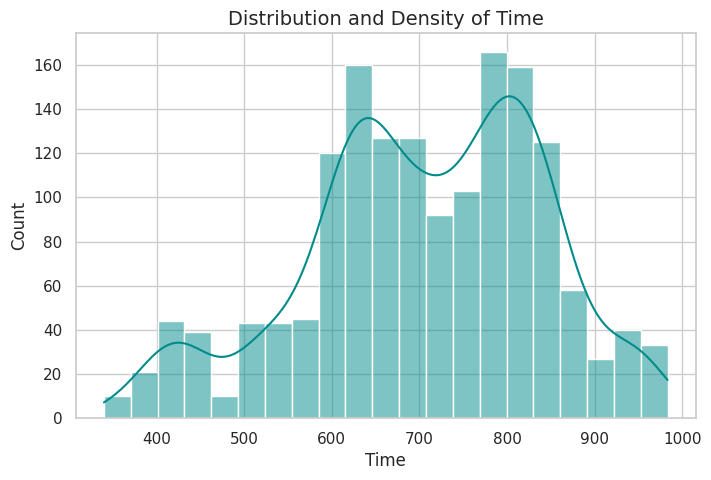

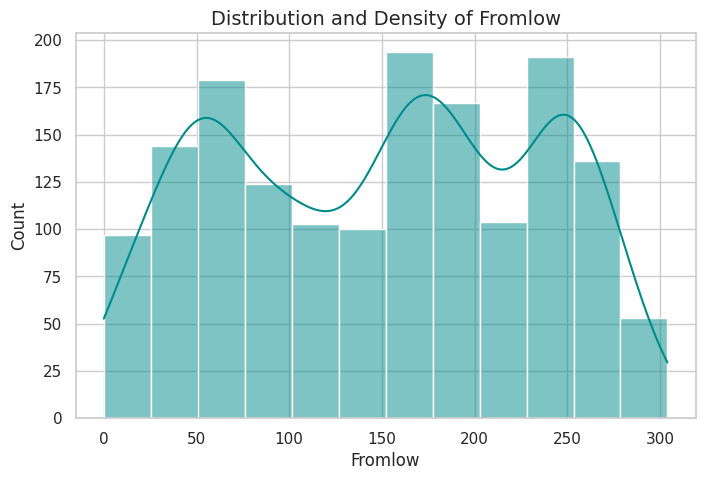

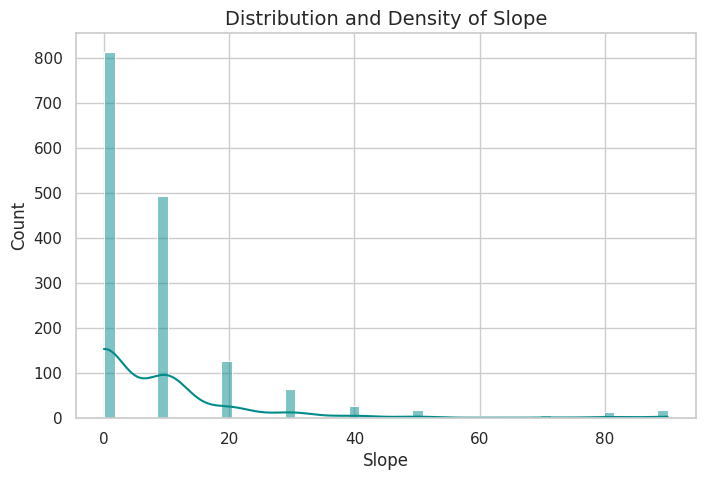

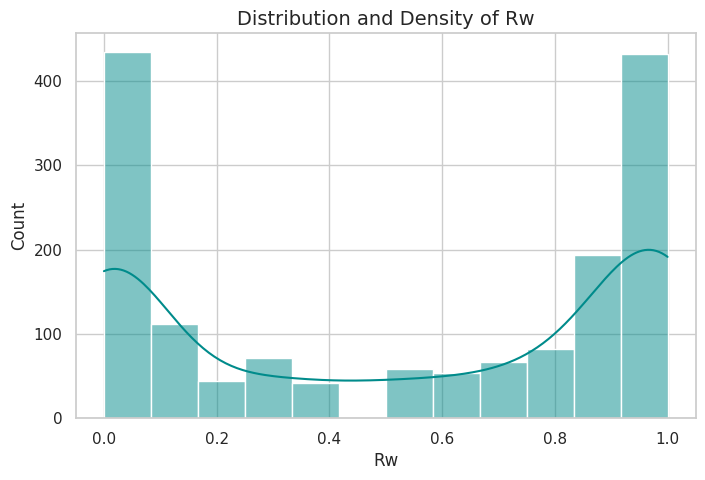

Generating counts for each categorical variable...


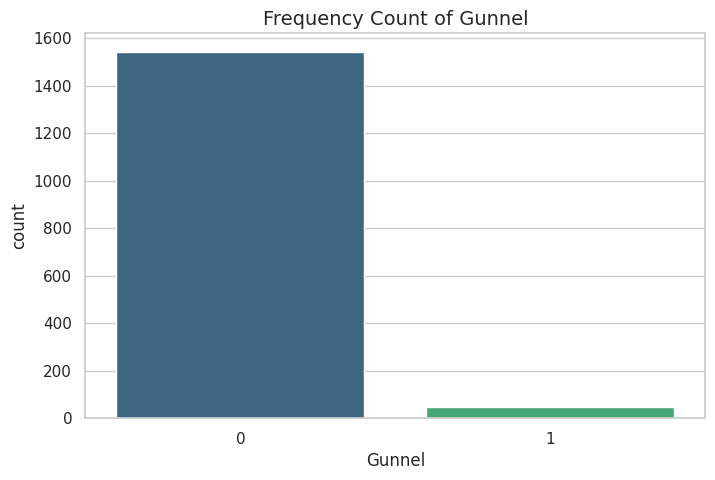

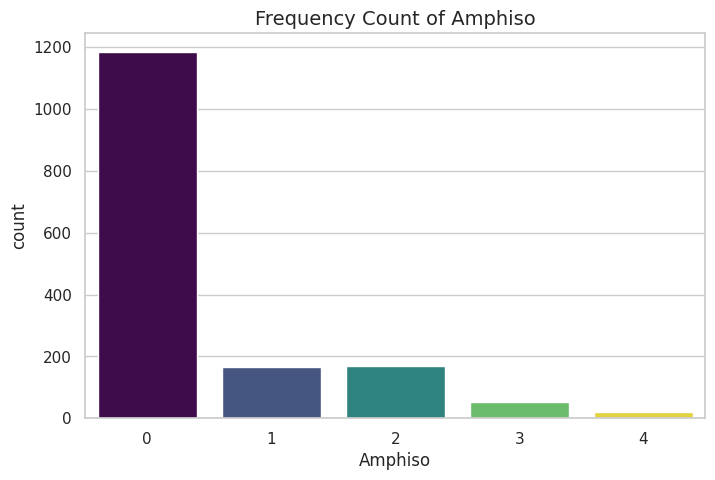

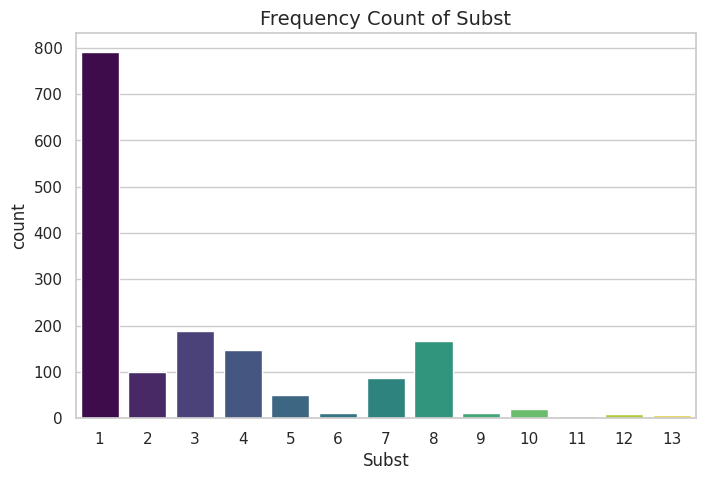

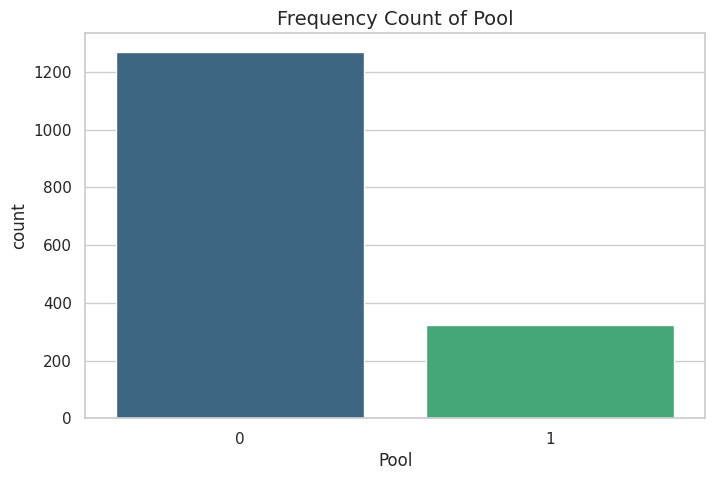

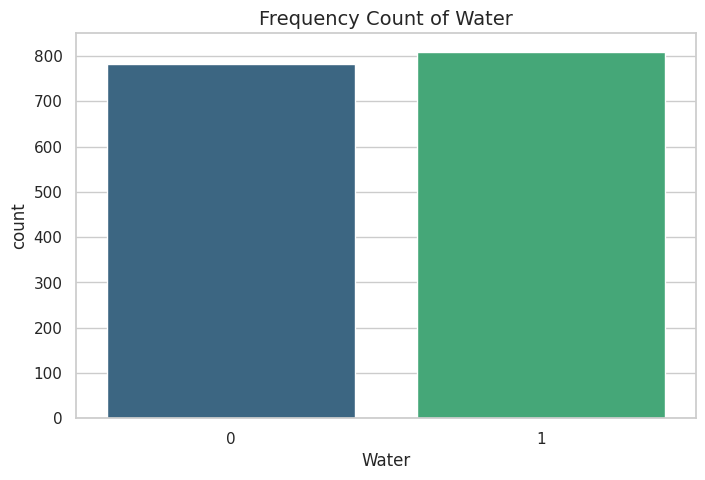

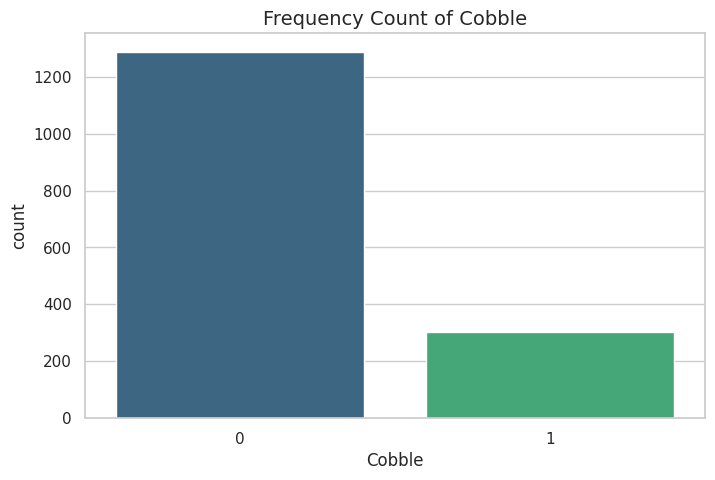

In [9]:
print("\nPerforming 1D Analysis...")

# Skewness and Quantiles for continuous variables
print("Skewness of Continuous Variables:")
print(df[continuous_cols].skew())
print("\nQuantiles of Continuous Variables:")
print(df[continuous_cols].quantile([0.25, 0.5, 0.75]))
print("-" * 60)


# Automated plotting loop for continuous variables
print("Generating distributions for each continuous variable...")
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='darkcyan')
    plt.title(f'Distribution and Density of {col}', size=14)
    plt.show()

# Automated plotting loop for categorical variables
print("Generating counts for each categorical variable...")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Frequency Count of {col}', size=14)
    plt.show()



#***Section 2: 2D and 3D Analysis***
-------------------------------------

#**(2.)Advanced 2D Analysis: Investigating Relationships Between Pairs of Variables**
Here, we explore the relationships between pairs of variables to uncover potential patterns and correlations.

Numerical vs. Numerical: The pairplot gives us a quick overview of correlations. We look for linear trends (positive or negative) in the scatter plots.

Numerical vs. Categorical: Boxplots are used to see if the distribution of a numerical variable changes across different categories. This can reveal significant differences between groups.

Categorical vs. Categorical: Heatmaps of crosstabulations show the frequency of co-occurrence between categories of two different variables. This helps identify strong associations.


Performing 2D Analysis...
Generating Pairplot for all continuous variables...


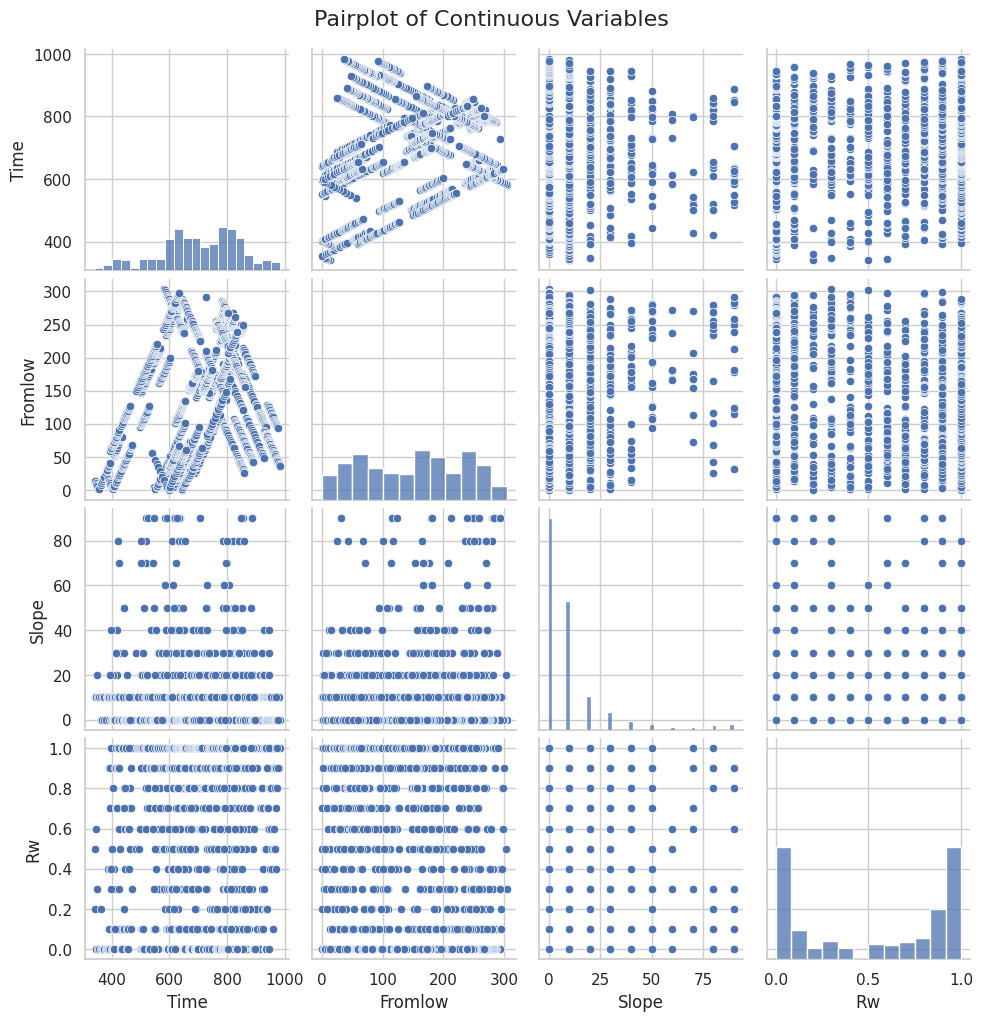

Generating Boxplots for Numerical vs. Categorical variables...


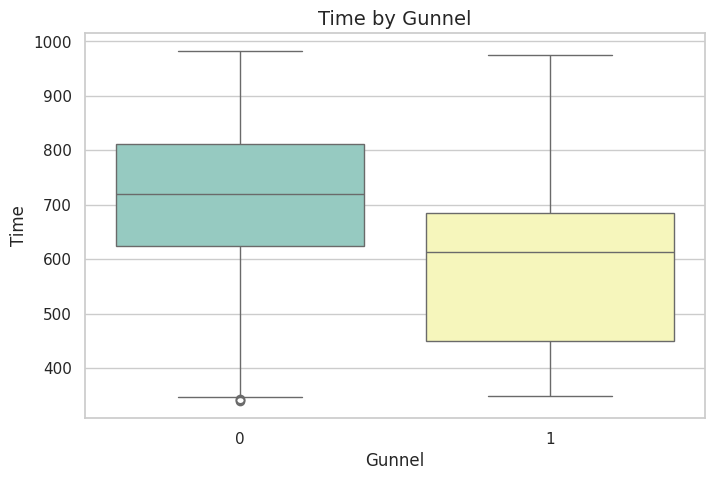

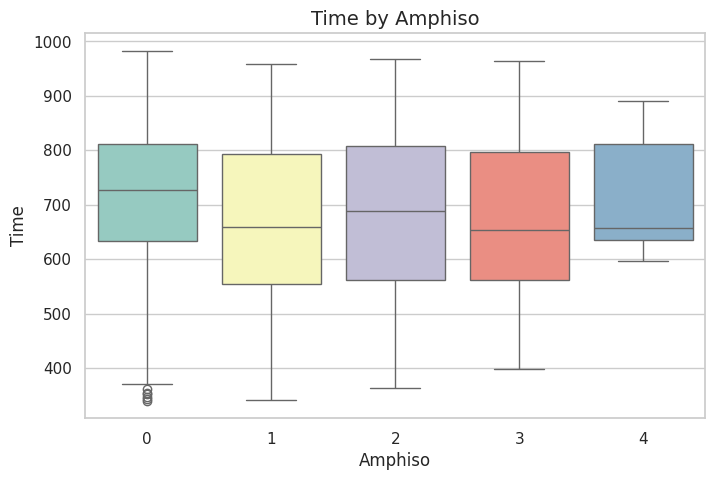

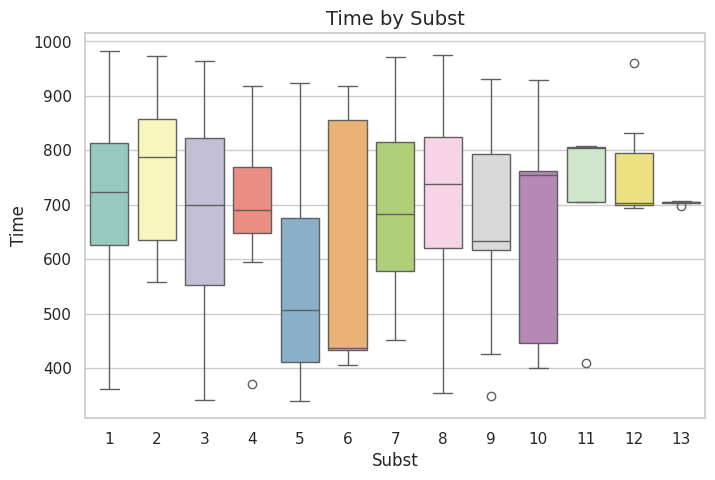

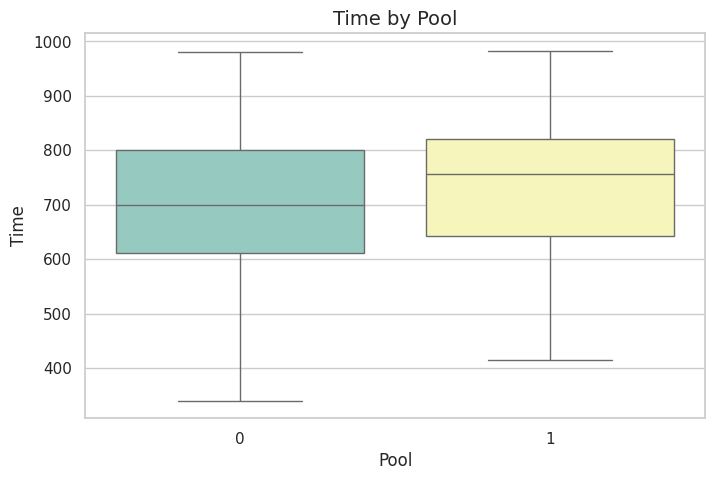

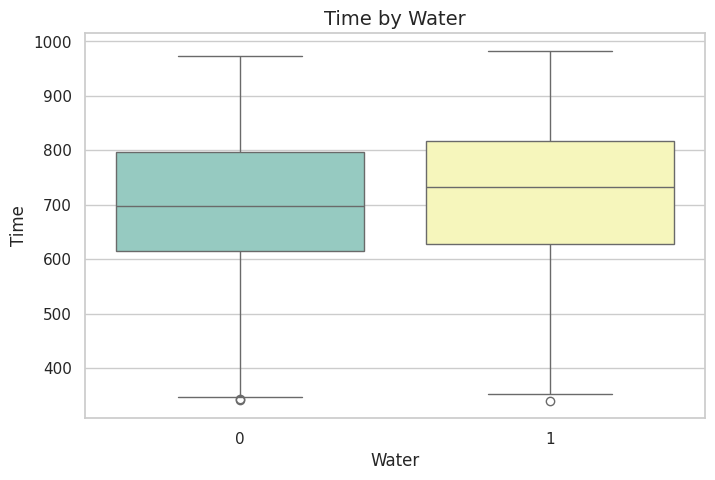

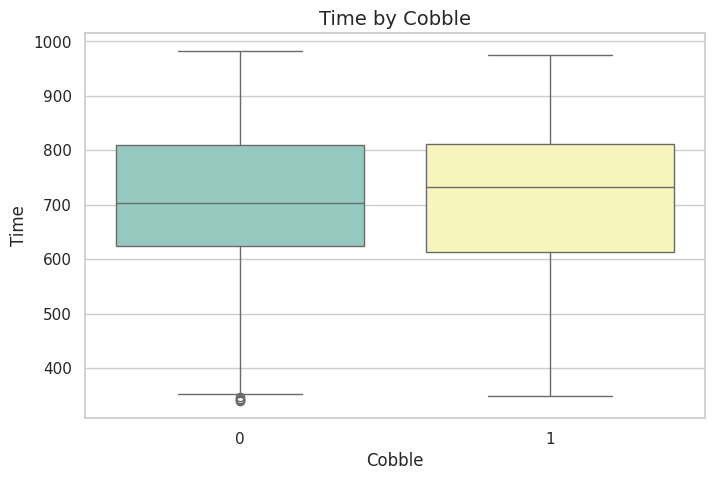

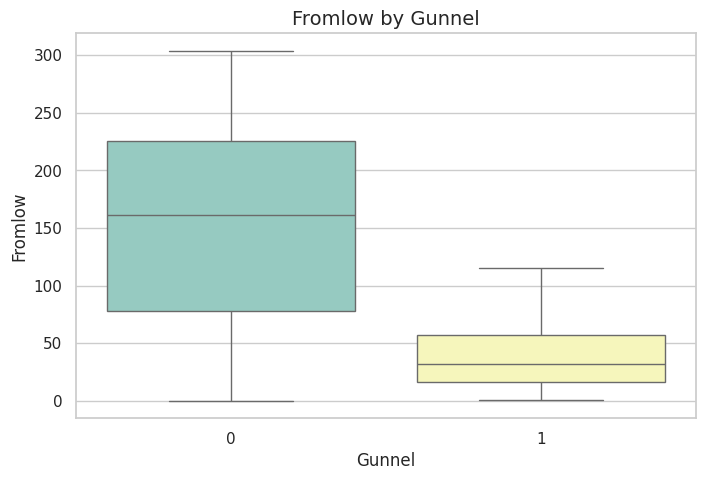

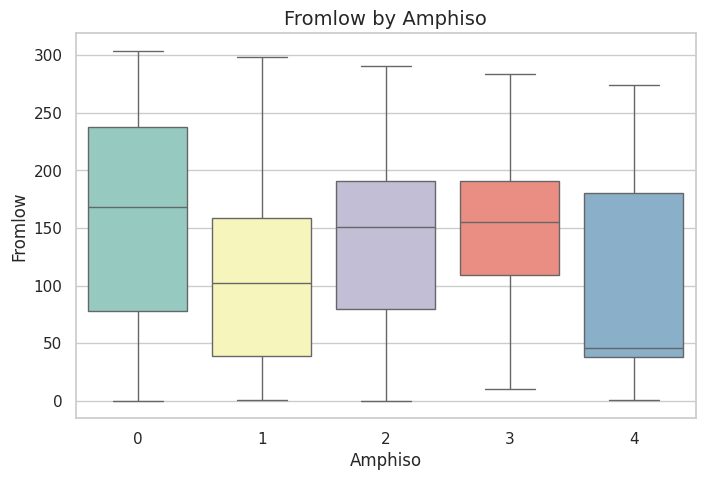

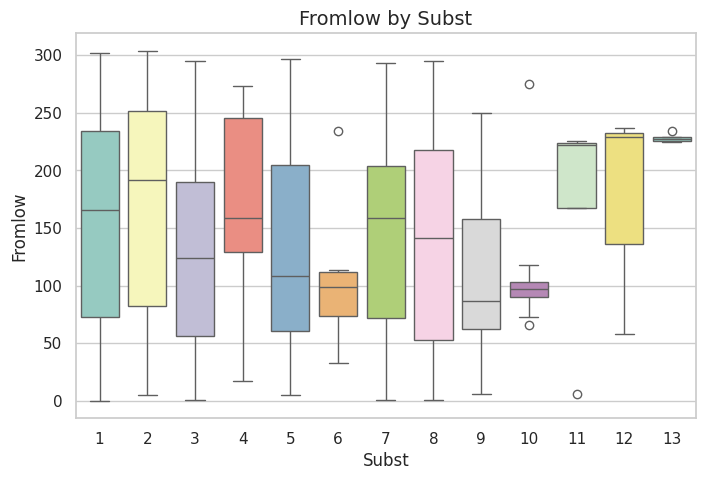

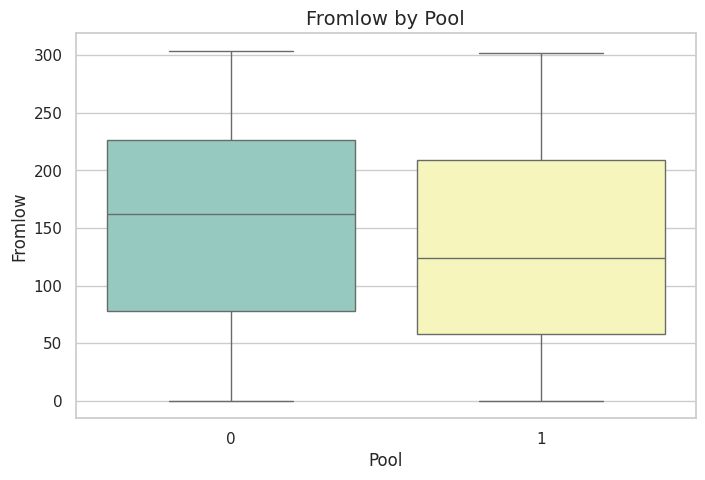

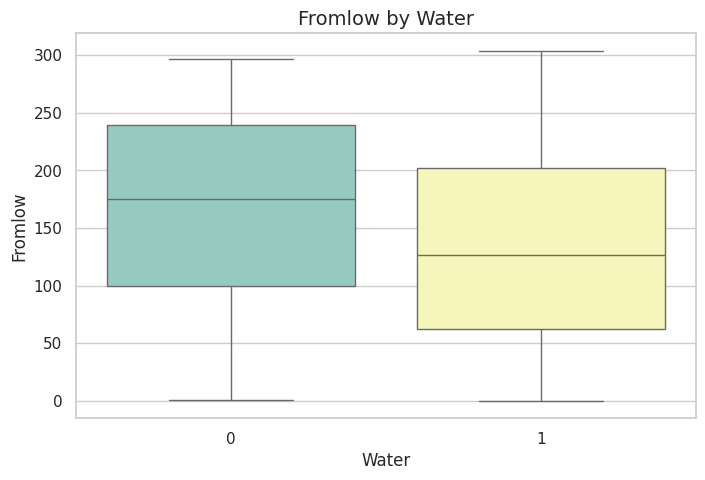

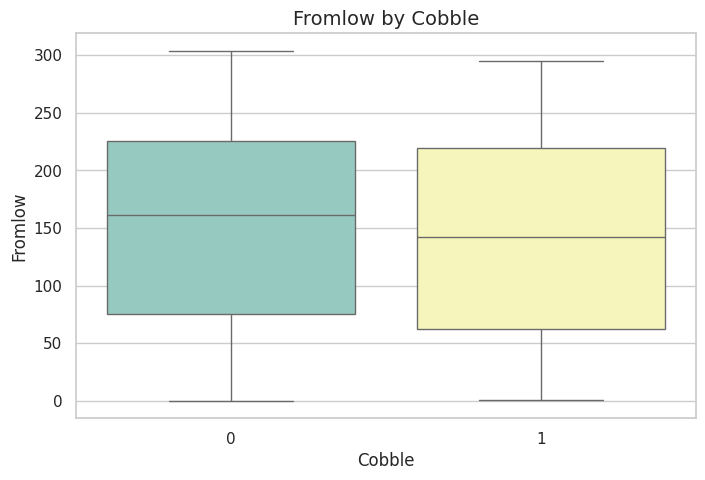

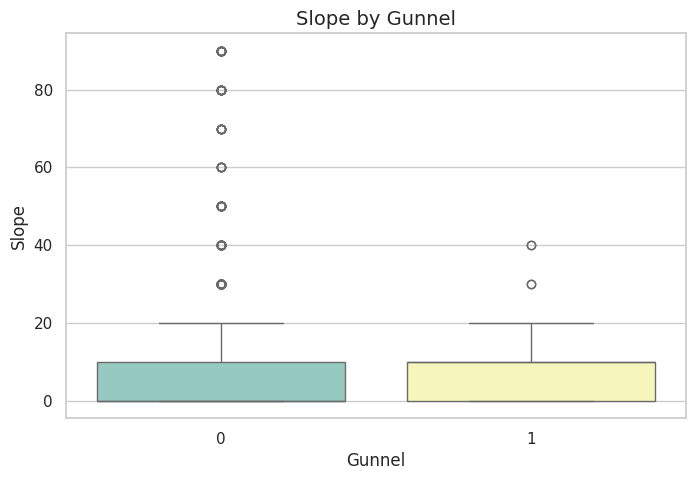

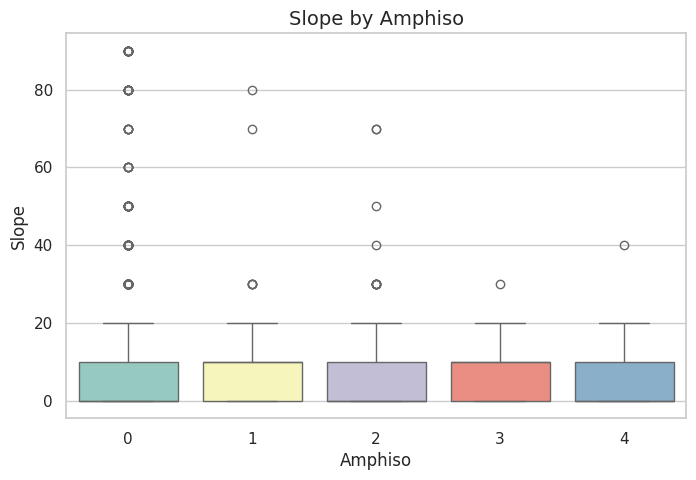

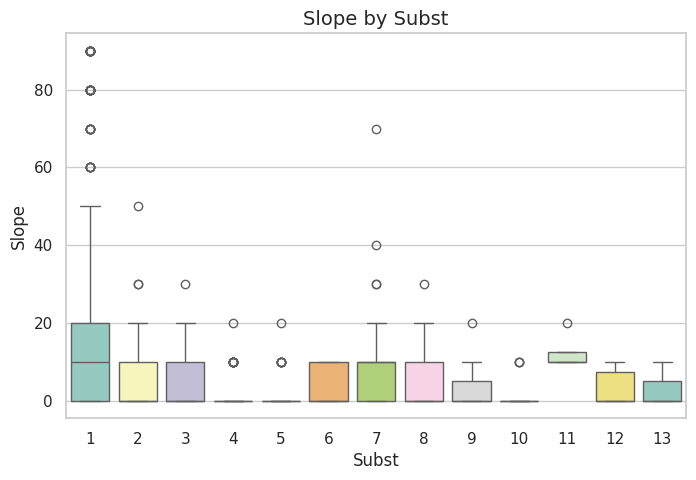

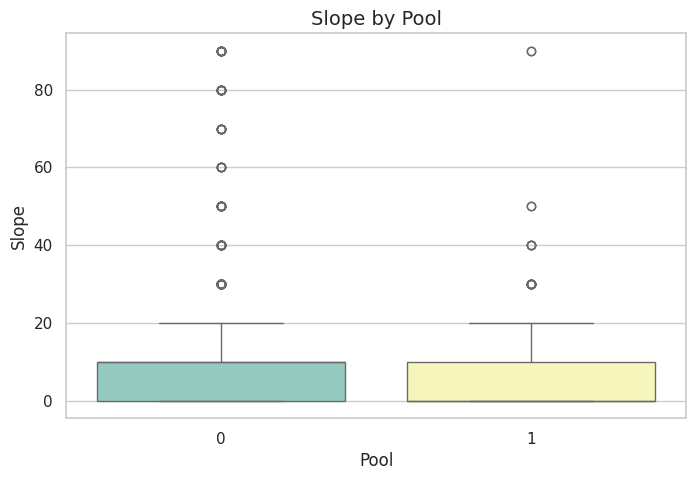

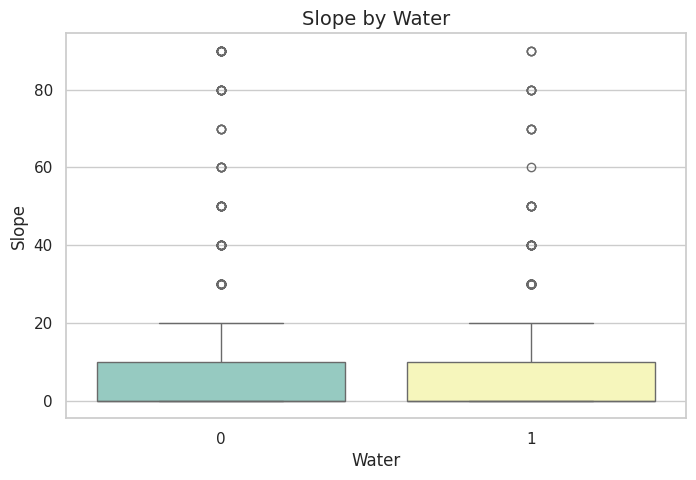

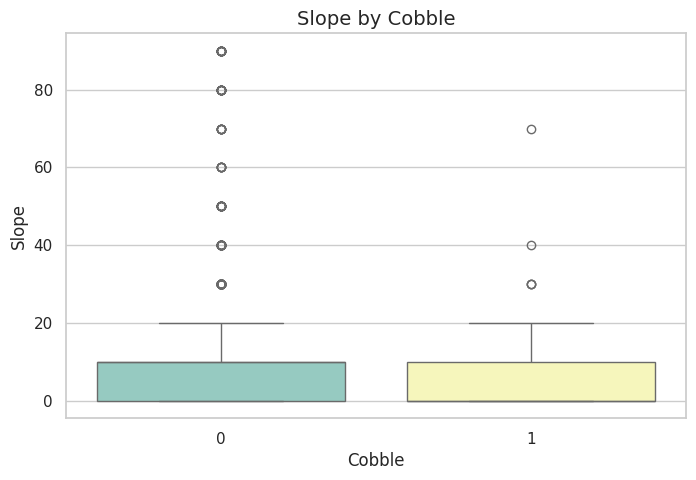

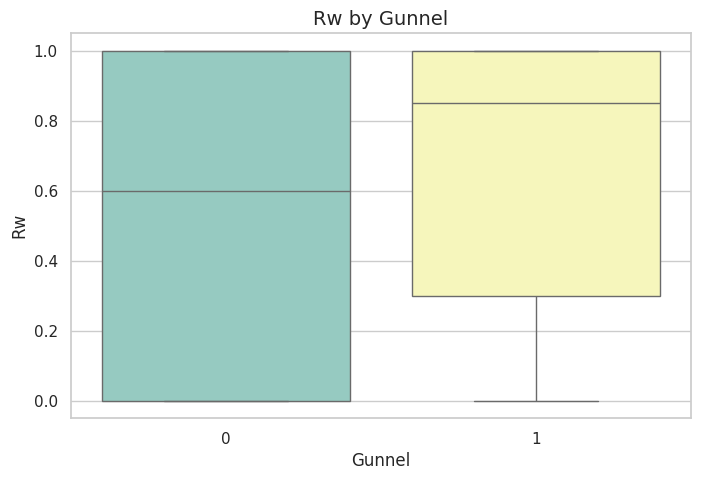

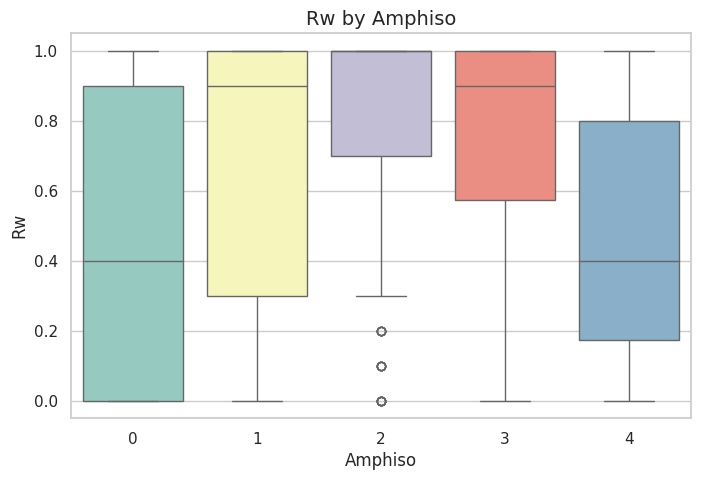

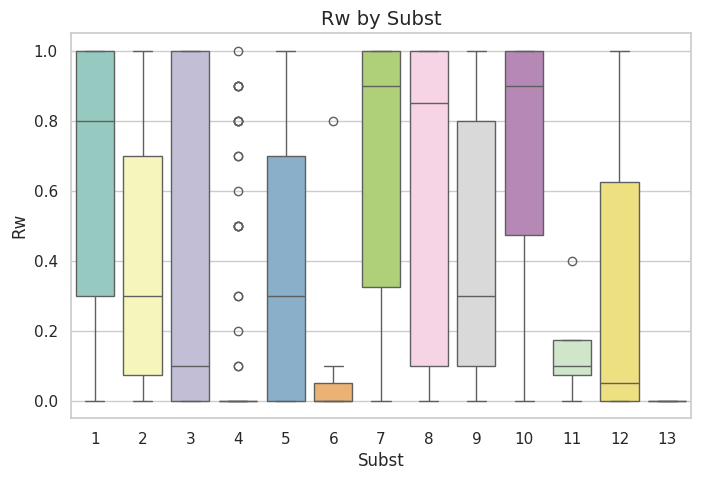

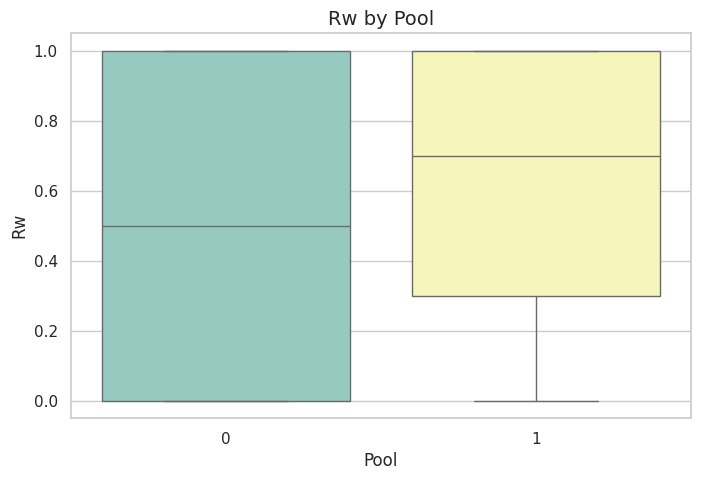

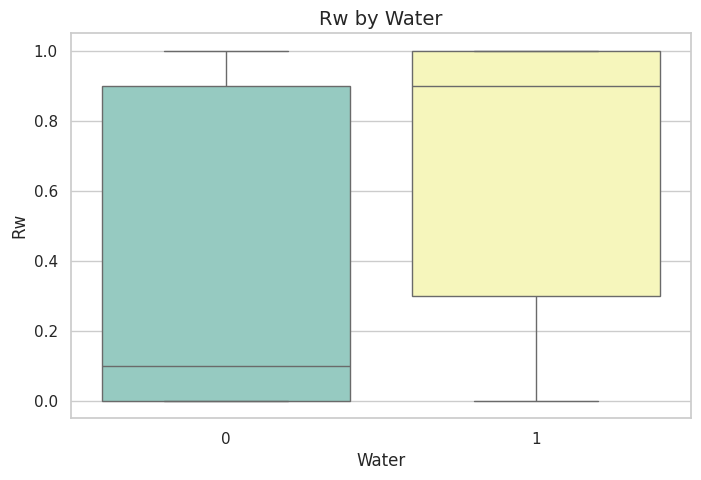

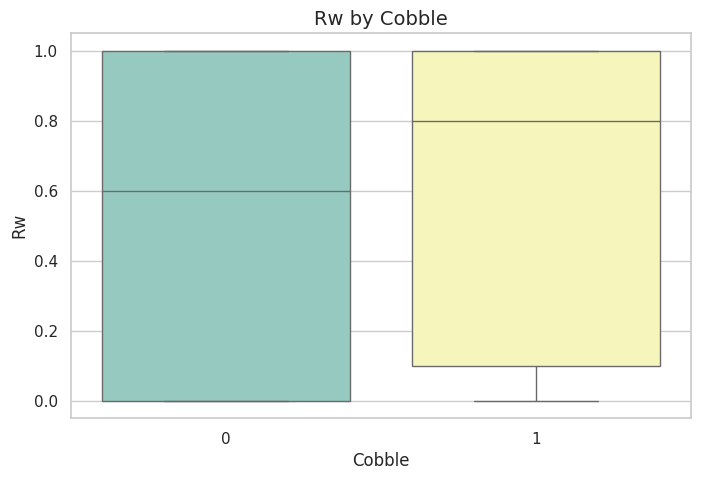

Generating Heatmaps for Categorical vs. Categorical variables...


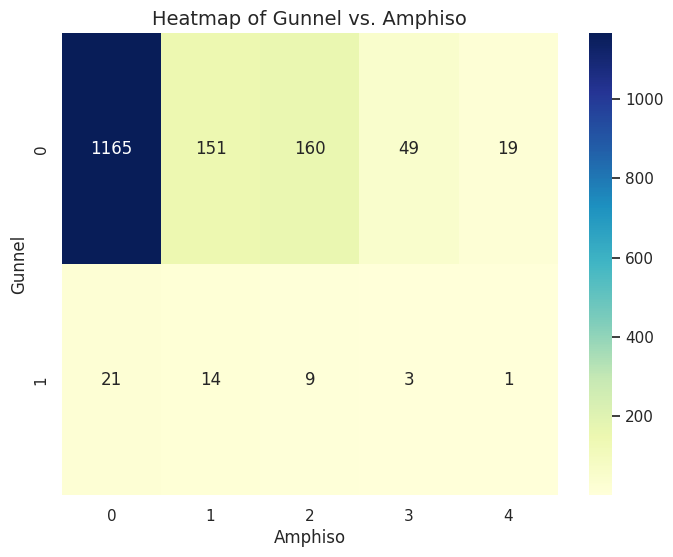

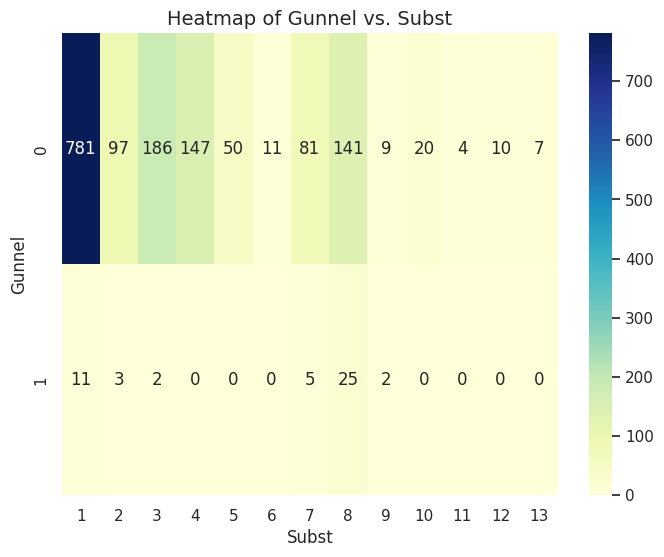

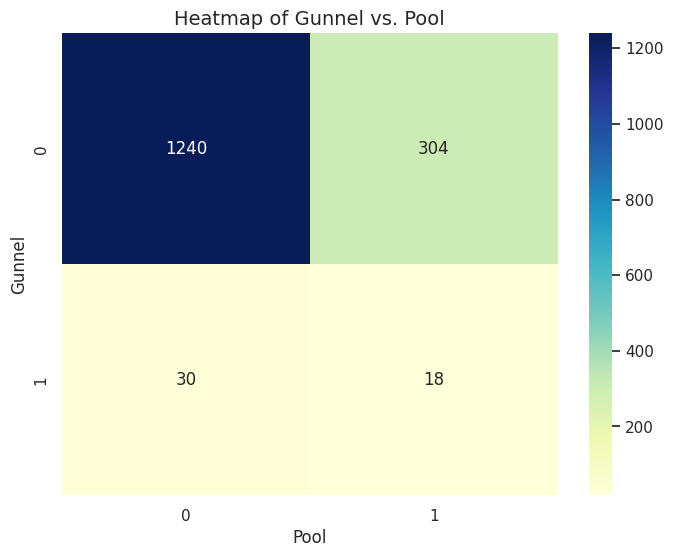

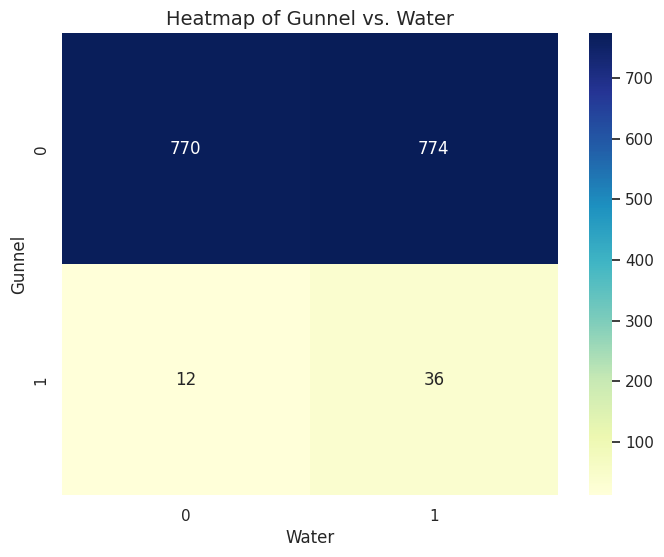

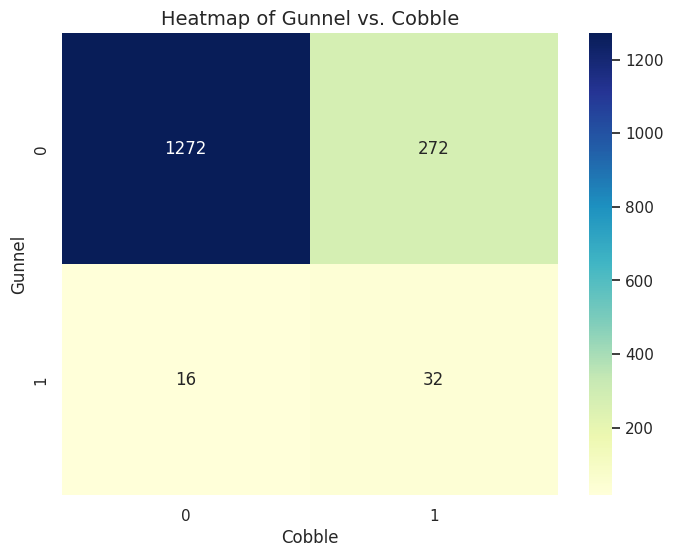

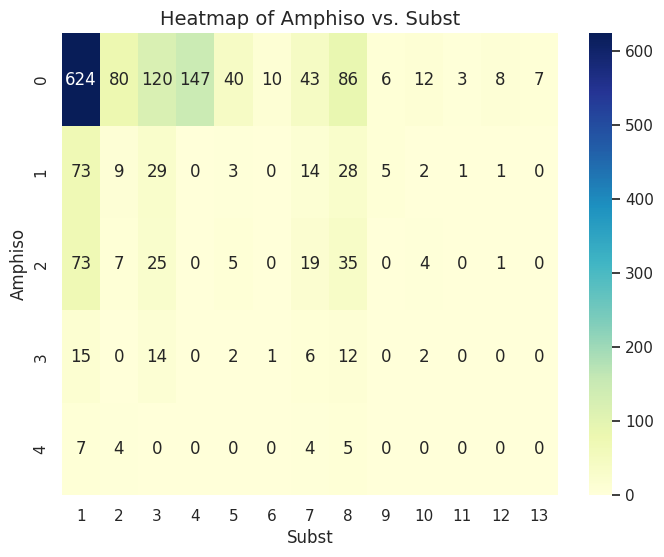

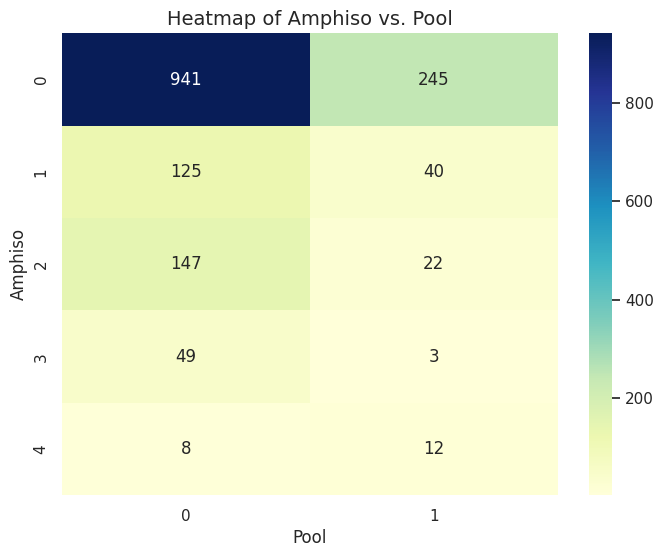

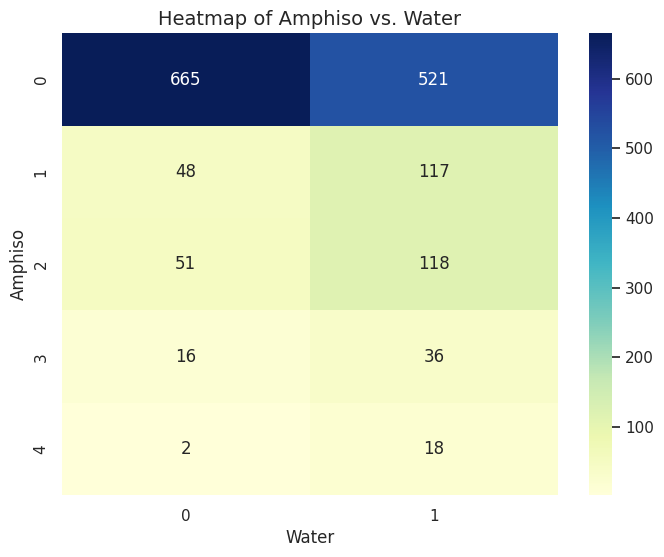

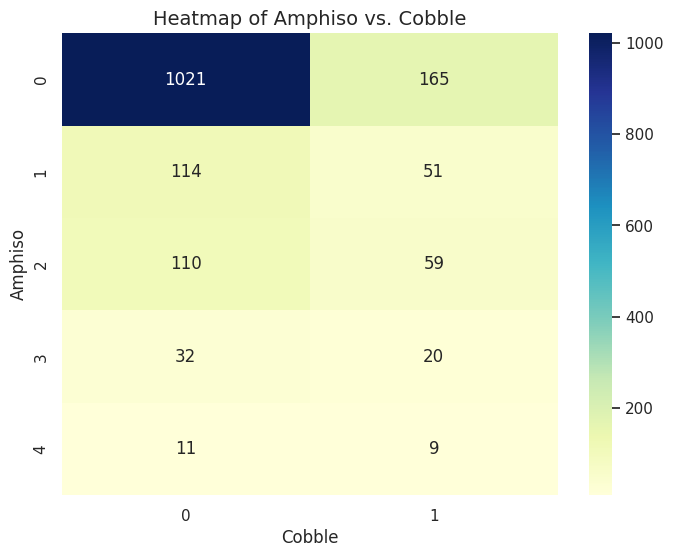

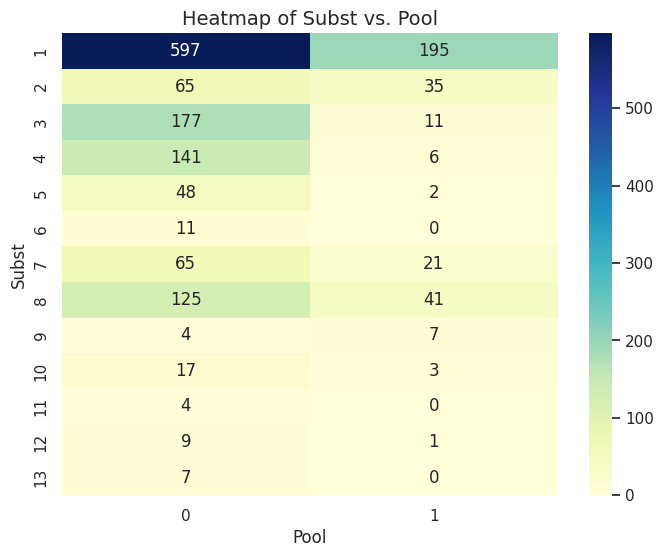

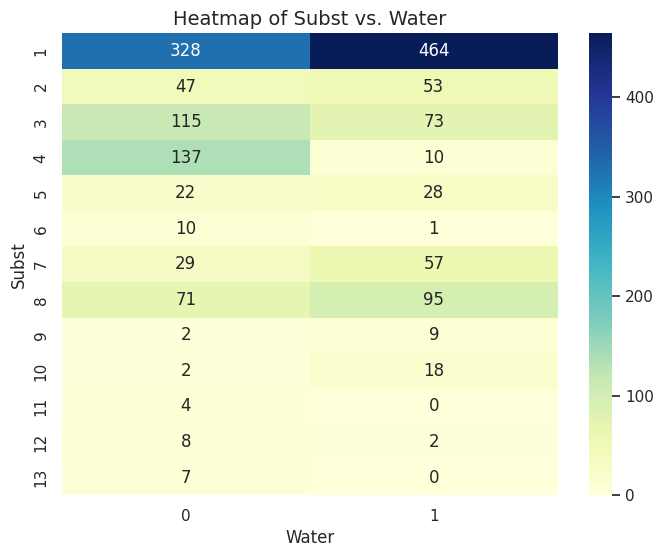

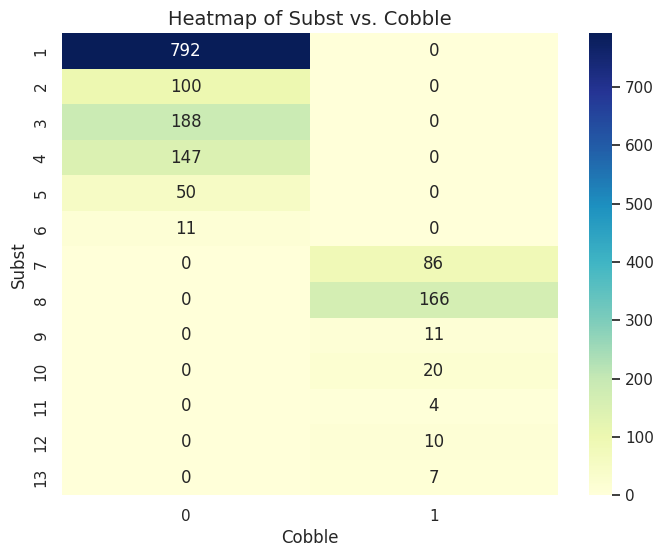

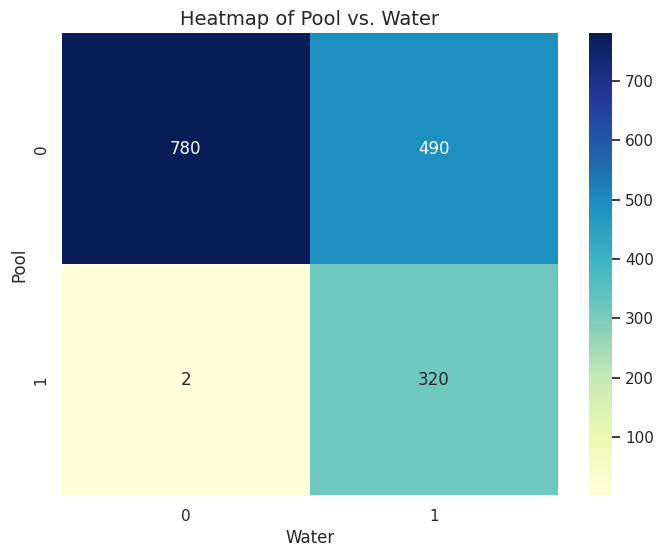

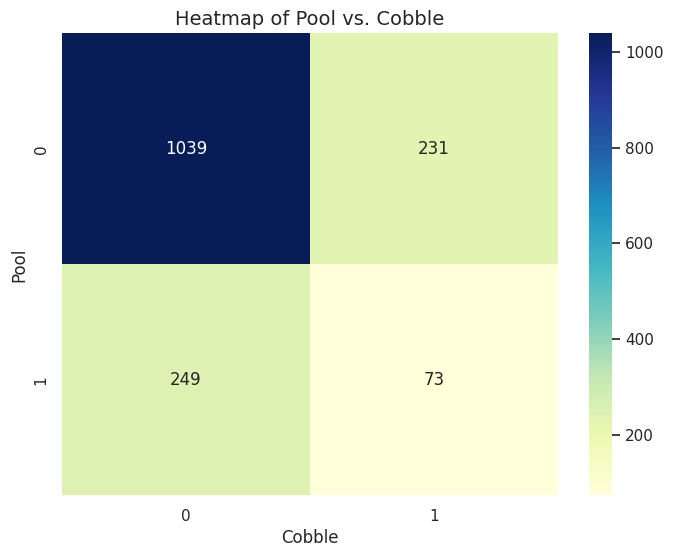

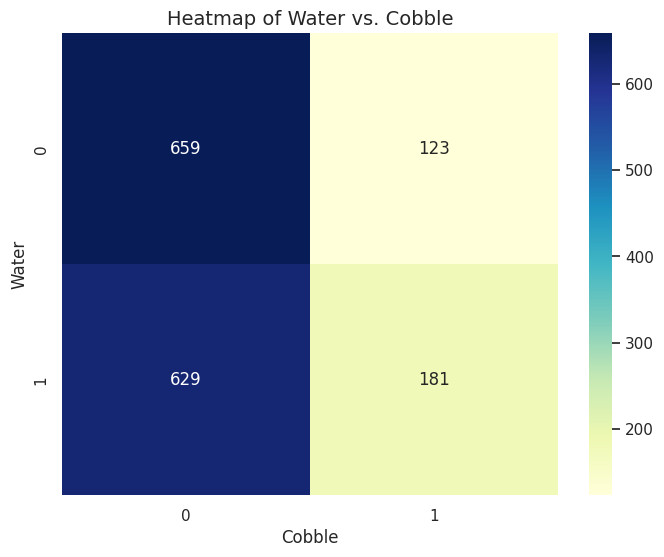

In [20]:
print("\nPerforming 2D Analysis...")

# Numerical vs. Numerical: Pairplot for a quick overview
print("Generating Pairplot for all continuous variables...")
sns.pairplot(df[continuous_cols])
plt.suptitle('Pairplot of Continuous Variables', y=1.02, size=16)
plt.show()

# Numerical vs. Categorical: Automated Boxplots
print("Generating Boxplots for Numerical vs. Categorical variables...")
for num_col in continuous_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set3', hue=cat_col, legend=False)
        plt.title(f'{num_col} by {cat_col}', size=14)
        plt.show()

# Categorical vs. Categorical: Automated Heatmaps
print("Generating Heatmaps for Categorical vs. Categorical variables...")
from itertools import combinations

for col1, col2 in combinations(categorical_cols, 2):
    crosstab_res = pd.crosstab(df[col1], df[col2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_res, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Heatmap of {col1} vs. {col2}', size=14)
    plt.show()


#**(3.) 3D Analysis: Visualizing Three Variables Simultaneously**
To add another layer of depth to our analysis, we can visualize three variables at once. This technique helps us understand if the relationship between two variables is influenced by a third.

We will demonstrate this in two distinct ways:

1.] Scatter Plot (Numerical vs. Numerical vs. Categorical): We will plot the relationship between two continuous variables, Slope and Fromlow. A third categorical variable, Water, will be represented by color. This helps us see if the scatter of points changes based on the presence of water.

2.] Box Plot (Numerical vs. Categorical vs. Categorical): We will examine the distribution of a continuous variable, Slope, across two different categorical variables, Pool and Water. This allows us to compare the median and spread of the Slope for all four combinations of conditions (e.g., with a pool and water, with a pool but no water, etc.).





Performing 3D Analysis with a Scatter Plot...


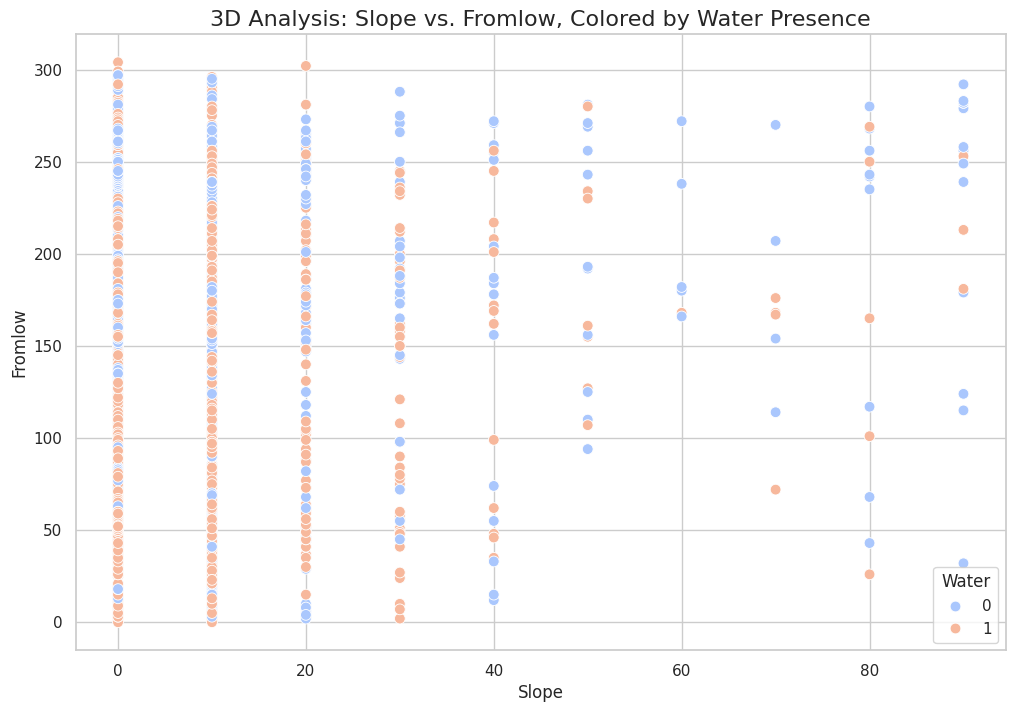


Performing 3D Analysis with a Box Plot...


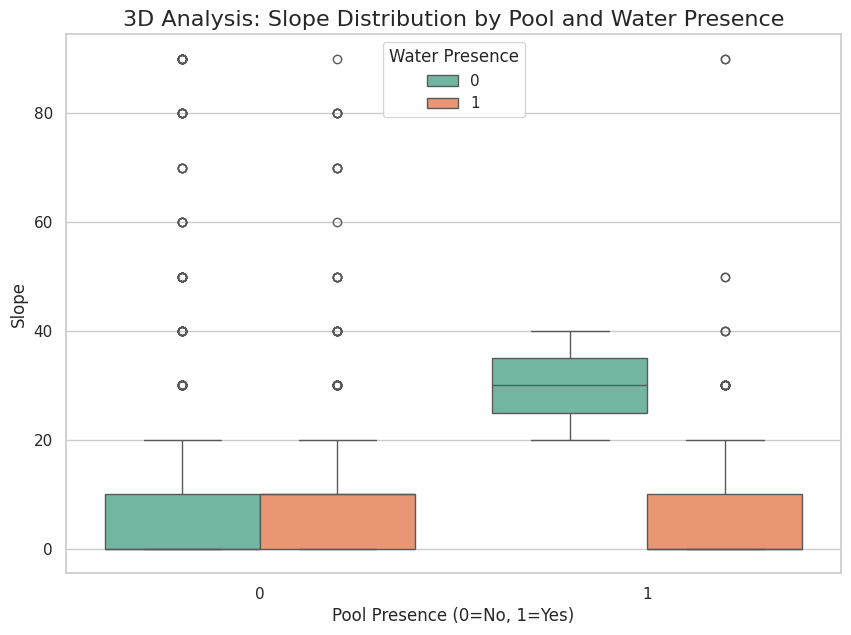

In [11]:
# --- 3D ANALYSIS ---
# --- Method 1: 3D Scatter Plot ---
print("\nPerforming 3D Analysis with a Scatter Plot...")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Slope', y='Fromlow', hue='Water', data=df, palette='coolwarm', s=60)
plt.title('3D Analysis: Slope vs. Fromlow, Colored by Water Presence', size=16)
plt.show()


# --- Method 2: 3D Box Plot ---
print("\nPerforming 3D Analysis with a Box Plot...")
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pool', y='Slope', hue='Water', data=df, palette='Set2')
plt.title('3D Analysis: Slope Distribution by Pool and Water Presence', size=16)
plt.xlabel("Pool Presence (0=No, 1=Yes)")
plt.ylabel("Slope")
plt.legend(title='Water Presence')
plt.show()

#***Section 3: Clustering***
----------------------------


##**Module 5: Unsupervised Learning - Clustering**
K-Means Clustering
Clustering is a machine learning technique used to group similar data points together. We use the K-Means algorithm to segment our data into distinct groups based on their continuous features.

The process involves:

Scaling the Data: Features are scaled to prevent variables with larger ranges from dominating the process.

The Elbow Method: We use this technique to find the optimal number of clusters (k) by identifying the point of diminishing returns.

Applying K-Means & Visualization: We run the algorithm with our chosen k and visualize the resulting clusters.






Performing K-Means Clustering...


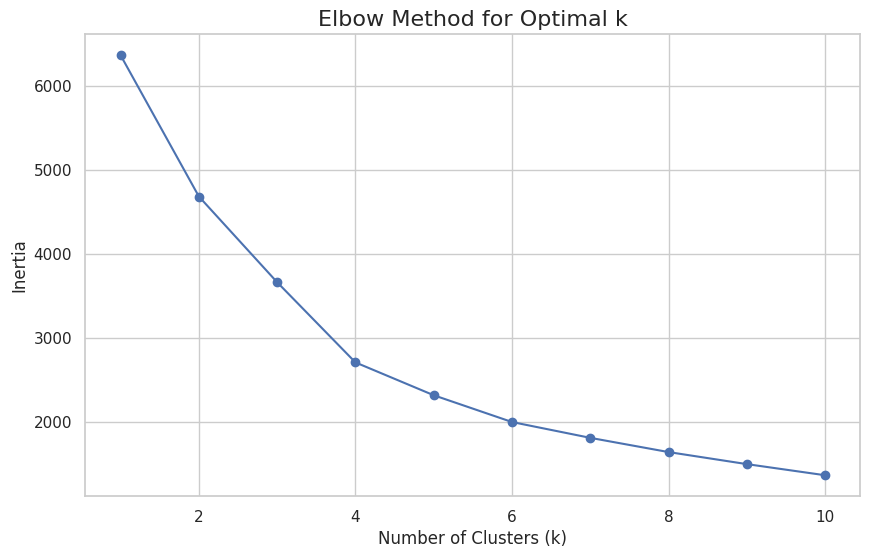

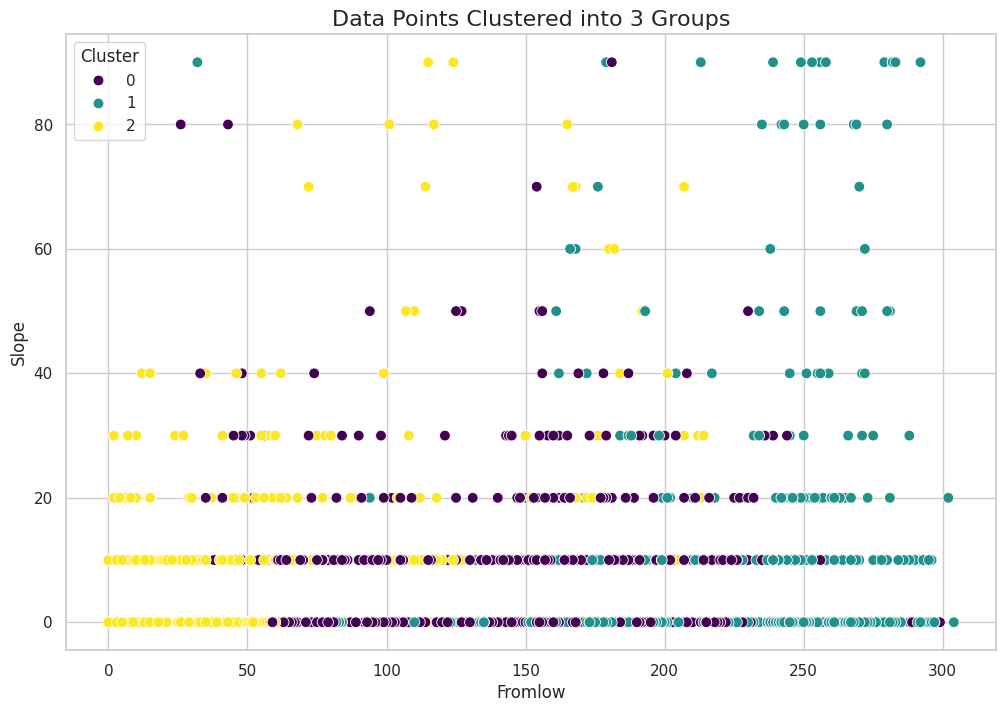


Clustering complete. 'Cluster' column has been added.


In [12]:
print("\nPerforming K-Means Clustering...")
features_for_clustering = ['Time', 'Fromlow', 'Slope', 'Rw']
X = df[features_for_clustering]

# Scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', size=16)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fromlow', y='Slope', hue='Cluster', data=df, palette='viridis', s=60)
plt.title(f'Data Points Clustered into {optimal_k} Groups', size=16)
plt.show()

print("\nClustering complete. 'Cluster' column has been added.")

###===============================================================
# **Phase 3: Dimensionality Reduction, Modeling & Evaluation**
###===============================================================

#***Section 1: Dimensionality Reduction - PCA***
-------------------------------------------------

In this section, we apply Principal Component Analysis (PCA).
PCA is a dimensionality reduction technique. Its goal is to take our continuous features (Time, Fromlow, Slope, Rw) and combine them into a smaller number of "principal components."

These components are new, artificial variables that capture the maximum possible variance from the original data. We will first run PCA to see how many components are needed to explain most of the data's variance (using a Scree Plot) and then visualize the data on its two largest components (PC1 and PC2) to see if they can visually separate the Gunnel (present/absent) classes.


Performing Dimensionality Reduction (PCA)...
Working with cleaned data, shape: (1592, 11)
------------------------------------------------------------


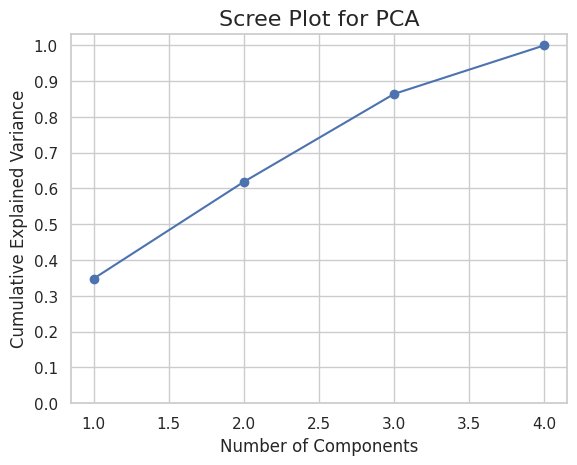

Variance explained by 1 component: 34.80%
Variance explained by 2 components: 61.87%
Variance explained by 3 components: 86.43%


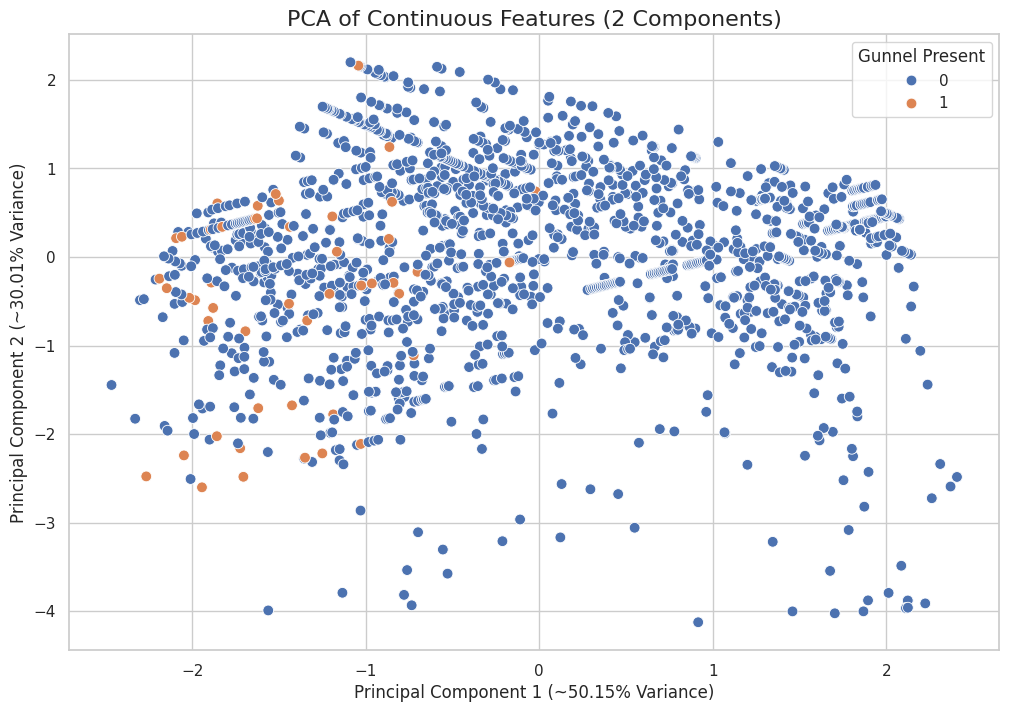

In [13]:
print("\nPerforming Dimensionality Reduction (PCA)...")

# Import necessary libraries for this section
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

print(f"Working with cleaned data, shape: {df.shape}")
print("-" * 60)

# --- 2. Prepare Data for PCA ---
continuous_features = ['Time', 'Fromlow', 'Slope', 'Rw']
X_continuous = df[continuous_features]

pca_scaler = StandardScaler()
X_scaled = pca_scaler.fit_transform(X_continuous)

# --- 3. Run PCA and Find Optimal Components (Scree Plot) ---
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

# plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA', size=16)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()

print(f"Variance explained by 1 component: {explained_variance_ratio[0]:.2%}")
print(f"Variance explained by 2 components: {np.cumsum(explained_variance_ratio)[1]:.2%}")
print(f"Variance explained by 3 components: {np.cumsum(explained_variance_ratio)[2]:.2%}")

# --- 4. Apply and Visualize PCA with 2 Components ---

pca_2 = PCA(n_components=2, random_state=42)
X_pca = pca_2.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Gunnel'] = df.reset_index(drop=True)['Gunnel']

# Plot the 2D PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Gunnel', data=df_pca, palette='deep', s=60)
plt.title('PCA of Continuous Features (2 Components)', size=16)
plt.xlabel('Principal Component 1 (~50.15% Variance)')
plt.ylabel('Principal Component 2 (~30.01% Variance)')
plt.legend(title='Gunnel Present')
plt.show()

#***Section 2: Model Building - Classification***
-------------------------------------------------

We will build and train two different classification models to see which one performs better.

Logistic Regression: A reliable, fast, and easy-to-interpret linear model. This will be our "baseline" model.

Random Forest: A more complex, tree-based model that is very powerful and can capture non-linear relationships.

We will use Pipelines for both models to ensure our StandardScaler is applied correctly to the training and test data without data leakage.

In [17]:
print("\nBuilding Supervised Classification Models...")

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # <-- New import
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Define Features (X) and Target (y) ---
continuous_features = ['Time', 'Fromlow', 'Slope', 'Rw']
categorical_features = ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
target = 'Gunnel'

X = df[continuous_features + categorical_features]
y = df[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("-" * 60)

# --- 2. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # for reproducible results
    stratify=y        # Ensures class balance in train/test
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print("-" * 60)

# --- 3. Create a Preprocessing Pipeline ---
# We re-use this *same* preprocessor for both models.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features)
    ],
    remainder='passthrough'
)

# --- 4. Create and Train Model 1: Logistic Regression ---
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression training complete.")
print("-" * 60)

# --- 5. Create and Train Model 2: Random Forest ---
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

print("Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest training complete.")


Building Supervised Classification Models...
Features (X) shape: (1592, 9)
Target (y) shape: (1592,)
------------------------------------------------------------
Training set size: 1114 samples
Test set size: 478 samples
------------------------------------------------------------
Training Logistic Regression model...
Logistic Regression training complete.
------------------------------------------------------------
Training Random Forest model...
Random Forest training complete.


#***Section 3: Evaluation of Model***
-------------------------------------------------

We will now evaluate both models on the test set—the data they have never seen before. We will compare them side-by-side using:

Accuracy: The percentage of correct predictions.

Classification Report: A breakdown of Precision, Recall, and F1-Score for each class.

Confusion Matrix: A visual table of correct vs. incorrect predictions.

Finally, we will create a summary table to declare the best-performing model for this dataset.


Evaluating Classification Models...
  Logistic Regression Results
Accuracy: 0.9728 (or 97.28%)

Classification Report:
                    precision    recall  f1-score   support

 Gunnel Absent (0)       0.97      1.00      0.99       464
Gunnel Present (1)       1.00      0.07      0.13        14

          accuracy                           0.97       478
         macro avg       0.99      0.54      0.56       478
      weighted avg       0.97      0.97      0.96       478


Confusion Matrix:


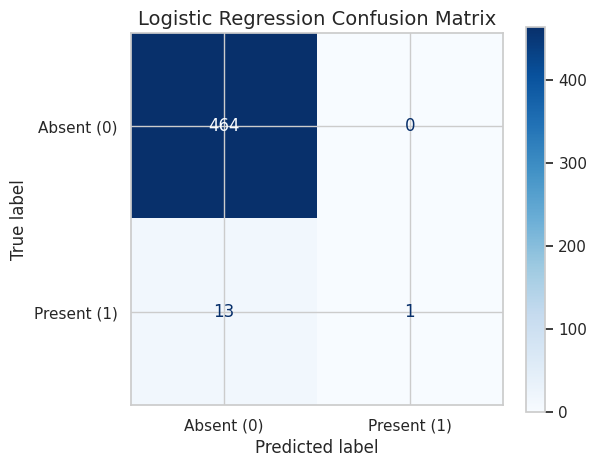


    Random Forest Results
Accuracy: 0.9707 (or 97.07%)

Classification Report:
                    precision    recall  f1-score   support

 Gunnel Absent (0)       0.97      1.00      0.99       464
Gunnel Present (1)       0.50      0.07      0.12        14

          accuracy                           0.97       478
         macro avg       0.74      0.53      0.56       478
      weighted avg       0.96      0.97      0.96       478


Confusion Matrix:


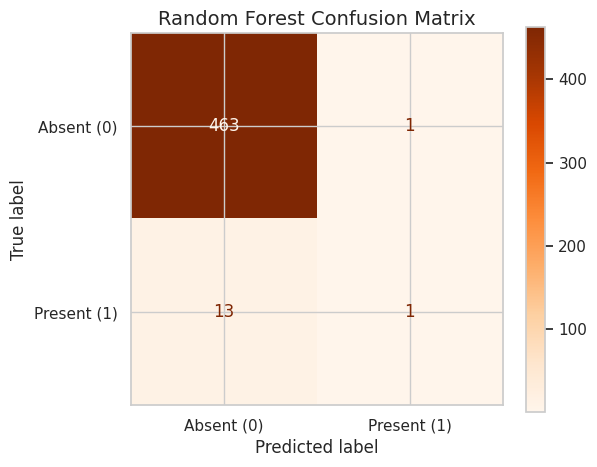


     Final Model Comparison
              Model  Accuracy  F1-Score (Class 1)
Logistic Regression  0.972803            0.133333
      Random Forest  0.970711            0.125000

---
Best Model (by F1-Score): Logistic Regression
Best Model Accuracy: 97.28%
Best Model F1-Score: 0.1333


In [18]:
print("\nEvaluating Classification Models...")

# Import necessary libraries for evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score
)
import pandas as pd

# --- 1. Get Predictions from Both Models ---
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# --- 2. Evaluate Model 1: Logistic Regression ---
print("=" * 30)
print("  Logistic Regression Results")
print("=" * 30)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1) # F1 for 'Gunnel Present (1)'
print(f"Accuracy: {accuracy_lr:.4f} (or {accuracy_lr*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Gunnel Absent (0)', 'Gunnel Present (1)']))

# Plot Confusion Matrix
print("\nConfusion Matrix:")
#
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=['Absent (0)', 'Present (1)'])
fig, ax = plt.subplots(figsize=(6, 5))
disp_lr.plot(cmap='Blues', ax=ax)
ax.set_title('Logistic Regression Confusion Matrix', size=14)
plt.show()


# --- 3. Evaluate Model 2: Random Forest ---
print("\n" + "=" * 30)
print("    Random Forest Results")
print("=" * 30)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1) # F1 for 'Gunnel Present (1)'
print(f"Accuracy: {accuracy_rf:.4f} (or {accuracy_rf*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Gunnel Absent (0)', 'Gunnel Present (1)']))

# Plot Confusion Matrix
print("\nConfusion Matrix:")
#
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['Absent (0)', 'Present (1)'])
fig, ax = plt.subplots(figsize=(6, 5))
disp_rf.plot(cmap='Oranges', ax=ax)
ax.set_title('Random Forest Confusion Matrix', size=14)
plt.show()


# --- 4. Final Model Comparison ---
print("\n" + "=" * 30)
print("     Final Model Comparison")
print("=" * 30)

# Create a summary DataFrame just like your friend did
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf],
    'F1-Score (Class 1)': [f1_lr, f1_rf]
})

# Sort by F1-Score, as it's often a better metric for imbalanced data
results_sorted = results_df.sort_values(by='F1-Score (Class 1)', ascending=False)

print(results_sorted.to_string(index=False))

best_model = results_sorted.iloc[0]
print("\n---")
print(f"Best Model (by F1-Score): {best_model['Model']}")
print(f"Best Model Accuracy: {best_model['Accuracy']:.2%}")
print(f"Best Model F1-Score: {best_model['F1-Score (Class 1)']:.4f}")

---
### 5. Feature Importance Analysis
Now that we have our best model (Random Forest), we can analyze it to understand *why* it works. We will extract the "feature importances" from the model, which tell us which columns in the data were the most helpful in predicting the presence of a Gunnel.


   Feature Importance Analysis
Most Important Features:
Fromlow    0.305324
Time       0.242262
Subst      0.108039
Rw         0.104576
Slope      0.084971
Amphiso    0.059428
Cobble     0.046188
Pool       0.029428
Water      0.019784
dtype: float64

Plotting feature importances...


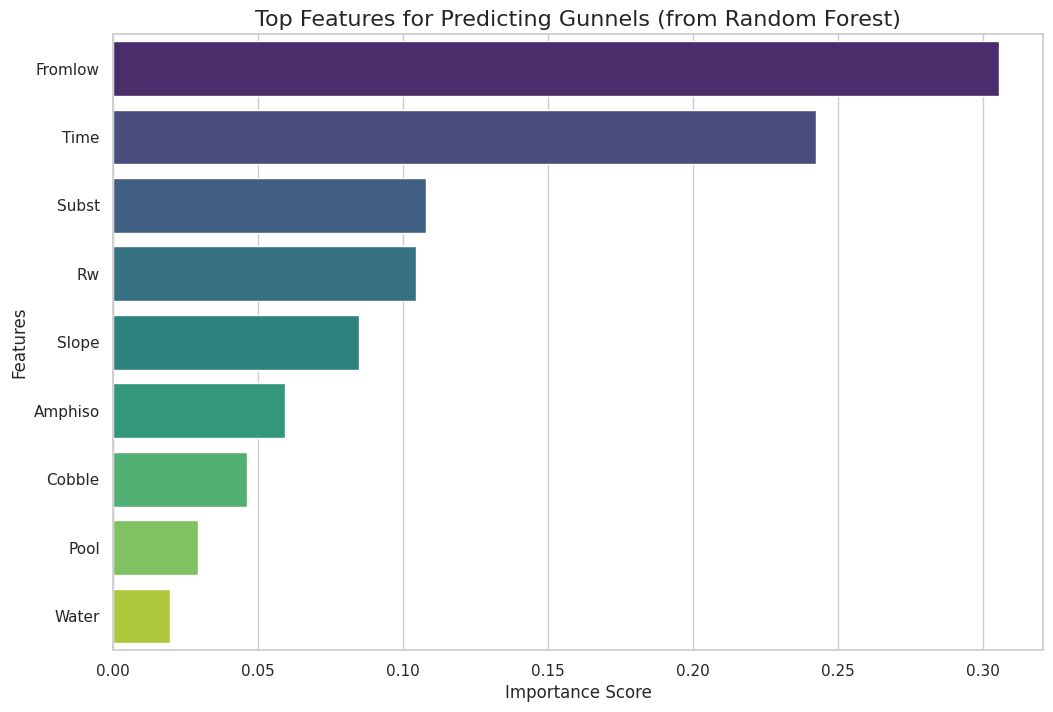

In [19]:
print("\n" + "=" * 30)
print("   Feature Importance Analysis")
print("=" * 30)

random_forest_model = rf_pipeline.named_steps['classifier']

preprocessor = rf_pipeline.named_steps['preprocessor']
# The 'num' transformer scales our continuous features
continuous_features = continuous_features

categorical_features_names = X.columns.drop(continuous_features).tolist()

# Combine all feature names in the correct order
all_feature_names = continuous_features + categorical_features_names

# Create a Pandas Series for easy plotting
importances = pd.Series(random_forest_model.feature_importances_, index=all_feature_names)
importances_sorted = importances.sort_values(ascending=False)

print("Most Important Features:")
print(importances_sorted)
print("\nPlotting feature importances...")

# Plot the importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index, palette='viridis', hue=importances_sorted.index, legend=False)
plt.title('Top Features for Predicting Gunnels (from Random Forest)', size=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()